# Bank customers segmentation

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import hamming, euclidean
from sklearn.manifold import TSNE

In [2]:
# data loading

df = pd.read_excel('BankClients.xlsx')
# df = df.sample(n = 2000, random_state = 42)

df_cat = df[['Gender', 'Job', 'Area', 'CitySize', 'Investments']]
df_num = df[['Age', 'FamilySize', 'Income', 'Wealth', 'Debt', 'FinEdu', 'ESG', 'Digital', 'BankFriend', 'LifeStyle', 'Luxury', 'Saving']]

# Hierarchical clustering
### Hamming distance for categorical variables
### Euclidean distance for numerical variables
### Method: Complete

In [3]:
# distance definition

def custom_distance(x, y):
    # hamming distance for categorical variables
    hamming_dist = hamming(x[:5], y[:5])
    
    # euclidean distance for numerical variables
    euclidean_dist = euclidean(x[5:], y[5:])
    
    # combined distances
    return hamming_dist + euclidean_dist

In [4]:
# linkage matrix computation

Z = linkage(np.hstack((df_cat, df_num)), metric = custom_distance, method='complete')

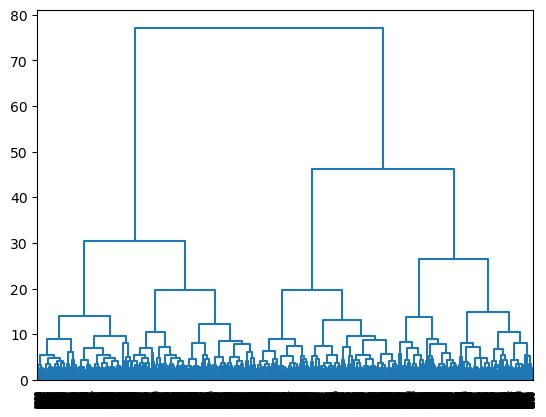

In [5]:
# dendogram plot

dendrogram(Z, color_threshold = 0)
plt.show()

In [6]:
# clusterized data

clusters = fcluster(Z, 5, criterion = 'maxclust')
df['Cluster'] = clusters

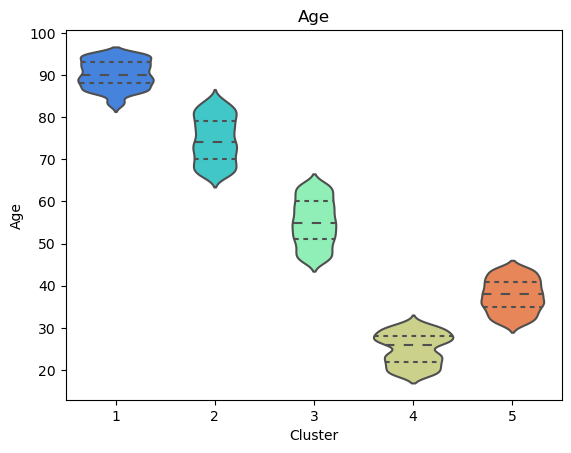

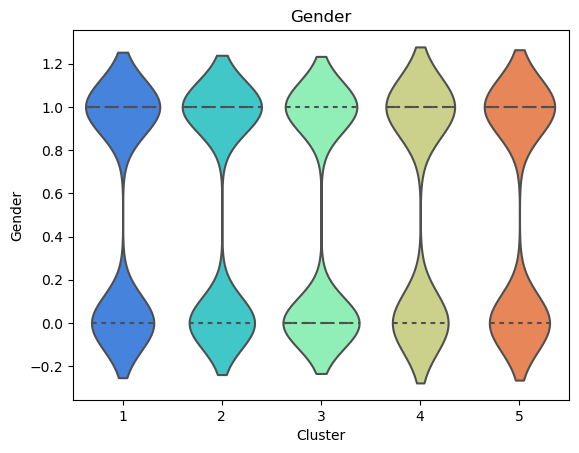

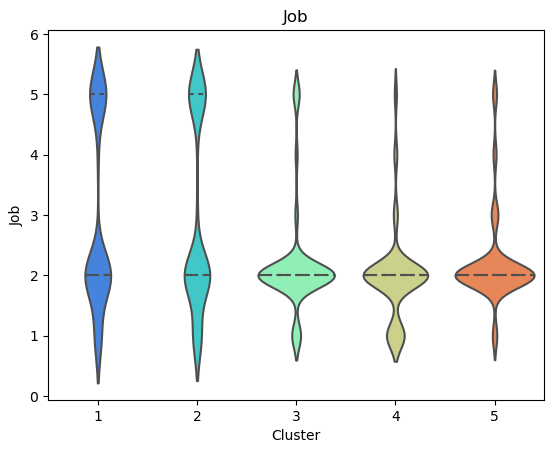

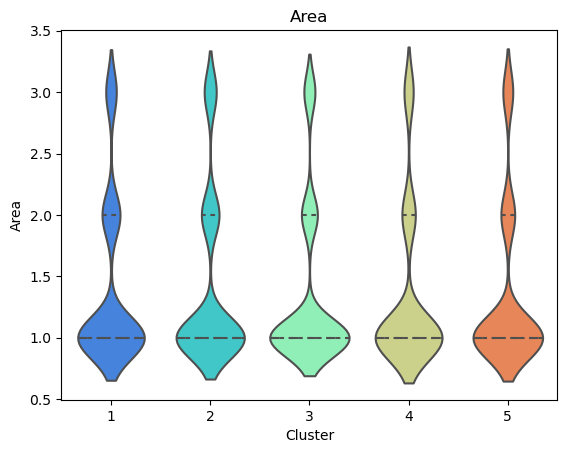

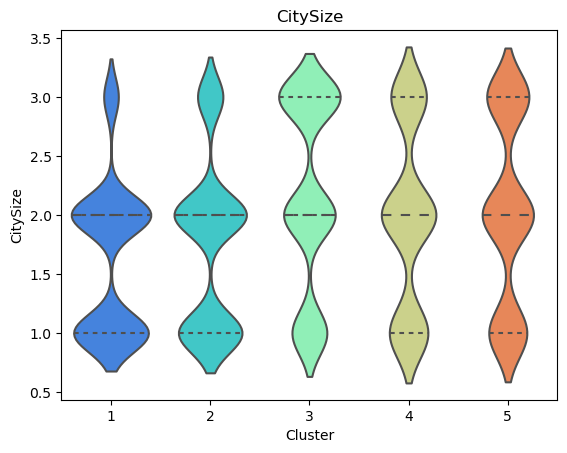

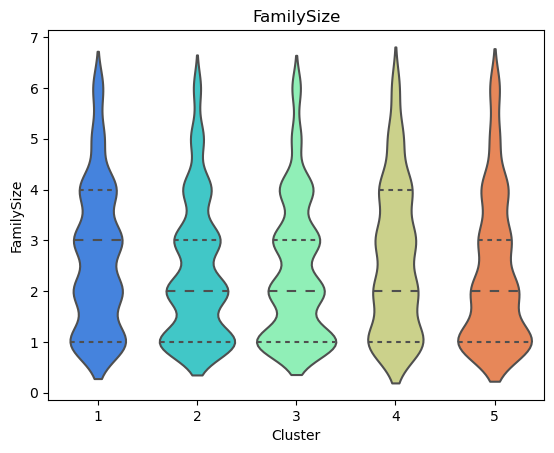

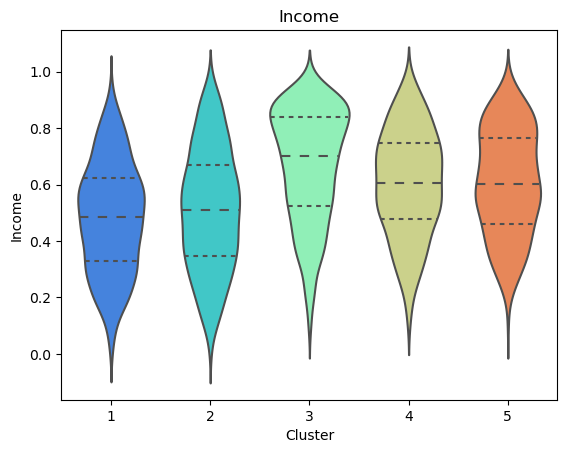

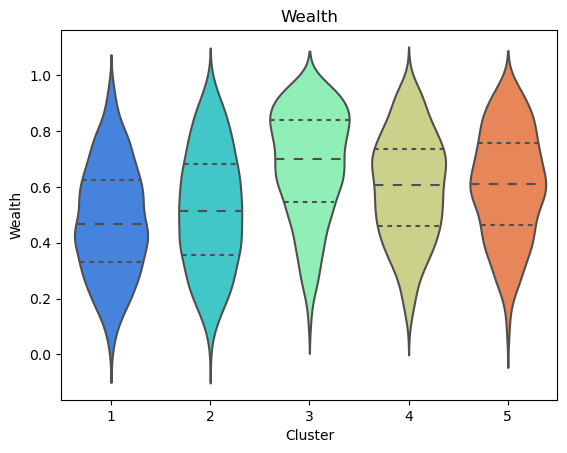

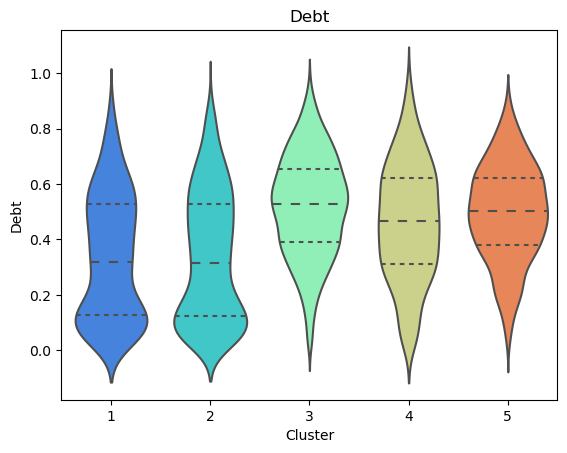

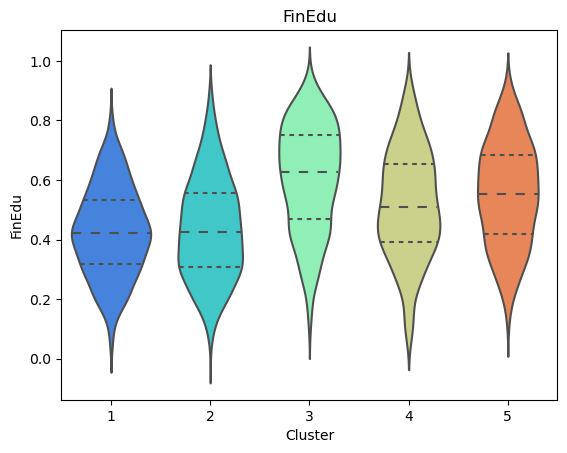

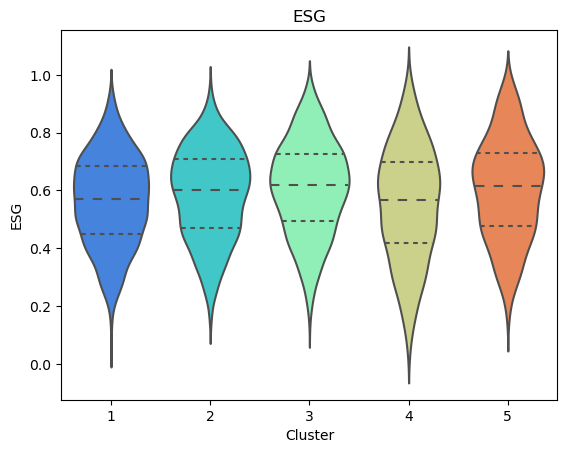

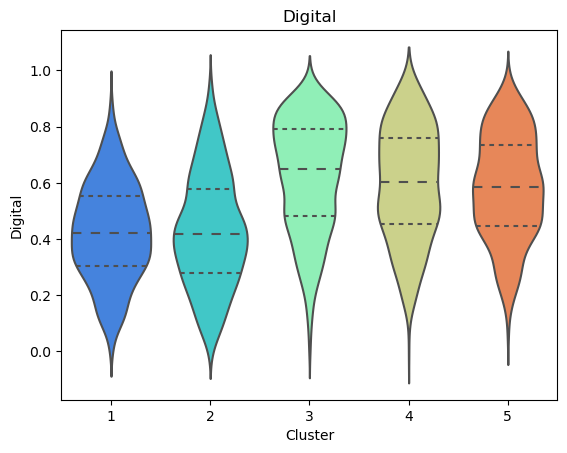

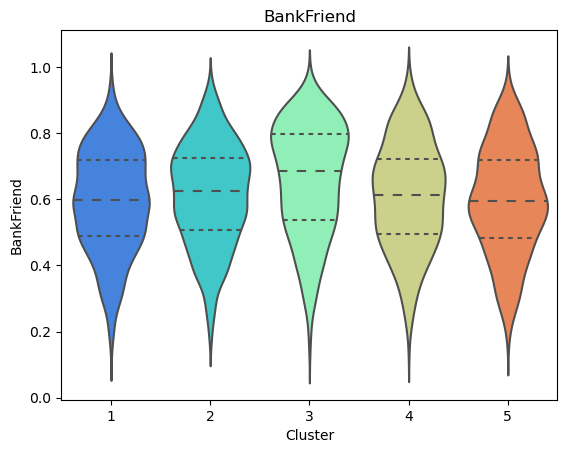

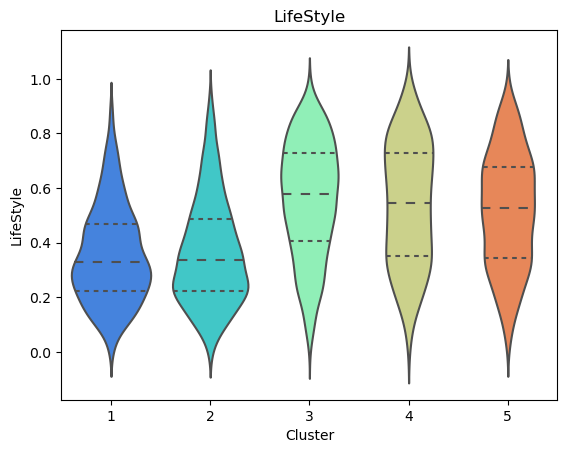

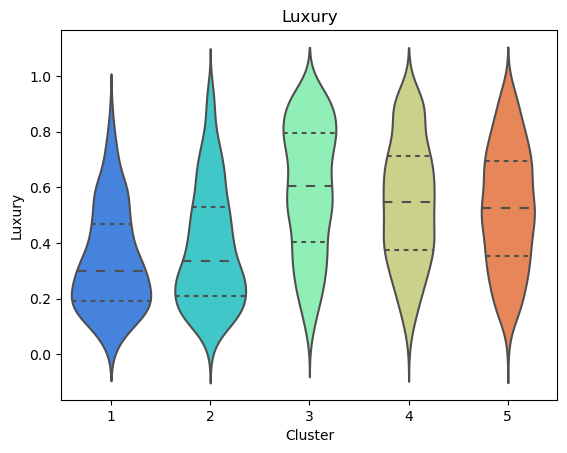

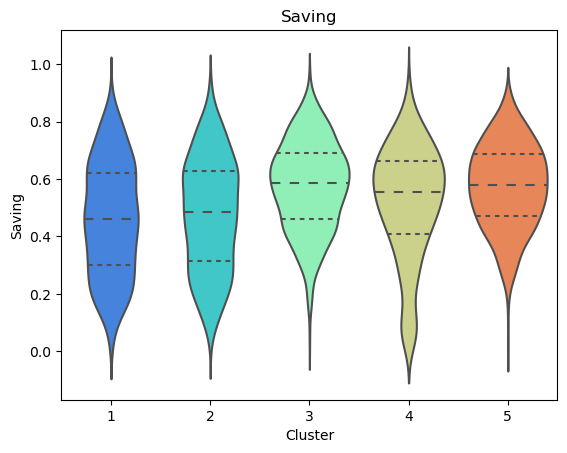

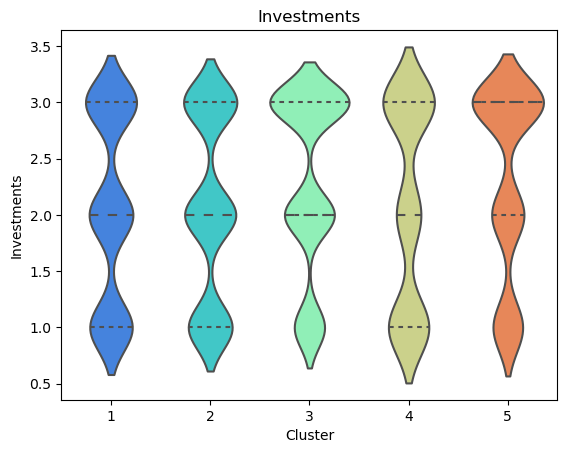

In [7]:
# boxplots

for col in df.columns[:-1]:
    sns.violinplot(x = 'Cluster', y = col, data = df, inner = 'quartile', palette = sns.color_palette('rainbow', 5))
    plt.title(col)
    plt.show()

# Hierarchical clustering (modified data)
### Do not consider variables which don't show a difference between groups and consider 'Job' as retired or not (1, 0)
### Hamming distance for categorical variables
### Euclidean distance for numerical variables
### Method: Complete

In [8]:
# reduced data variables

df_red = df.drop(columns = ['Gender', 'Area', 'FamilySize', 'ESG', 'Cluster'])
df_red['Job'] = df_red['Job'].replace({1: 0, 2: 0, 3: 0, 4: 0, 5: 1})

df_red_cat = df_red[['Job', 'CitySize', 'Investments']]
df_red_num = df_red[['Age', 'Income', 'Wealth', 'Debt', 'FinEdu', 'Digital', 'BankFriend', 'LifeStyle', 'Luxury', 'Saving']]

<Axes: >

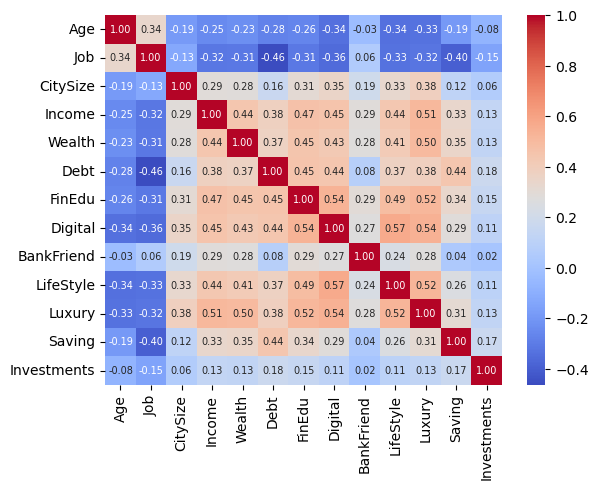

In [9]:
# correlation matrix

sns.heatmap(df_red.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f", annot_kws = {"size": 7})

In [10]:
# distance definition

def custom_red_distance(x, y):
    # hamming distance for categorical variables
    hamming_dist = hamming(x[:3], y[:3])
    
    # euclidean distance for numerical variables
    euclidean_dist = euclidean(x[3:], y[3:])
    
    # combined distances
    return hamming_dist + euclidean_dist

In [11]:
# linkage matrix computation

Z_red = linkage(np.hstack((df_red_cat, df_red_num)), metric = custom_red_distance, method = 'complete')

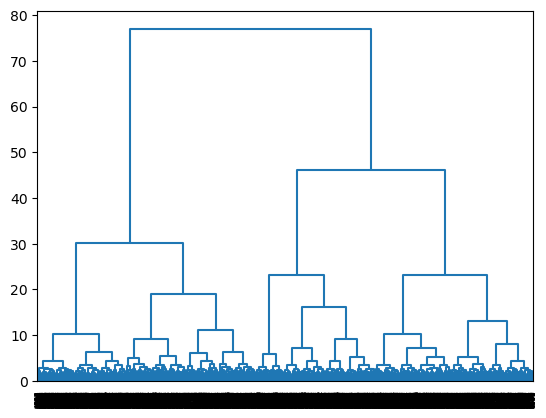

In [12]:
# dendogram plot

dendrogram(Z_red, color_threshold = 0)
plt.show()

In [13]:
# clusterized data

clusters = fcluster(Z_red, 5, criterion = 'maxclust')
df_red['Cluster'] = clusters

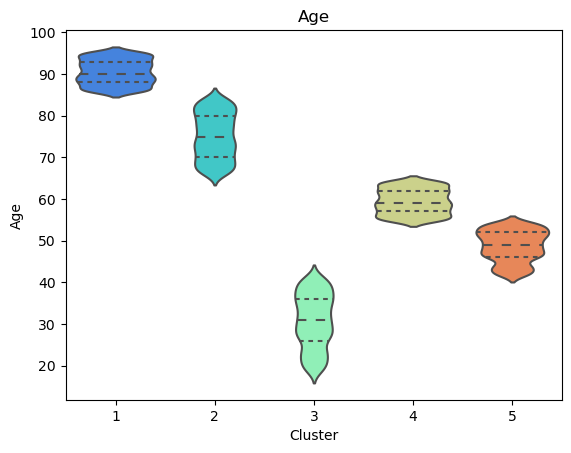

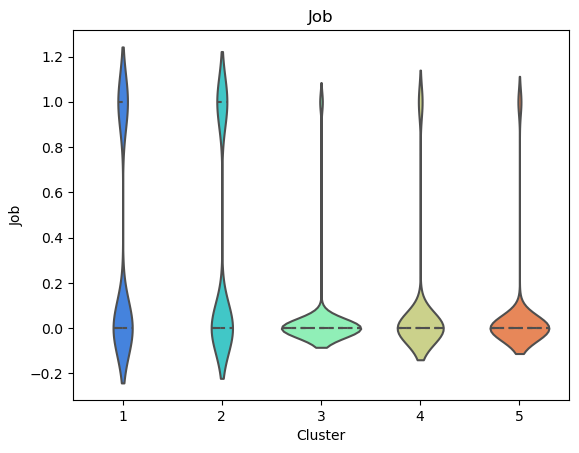

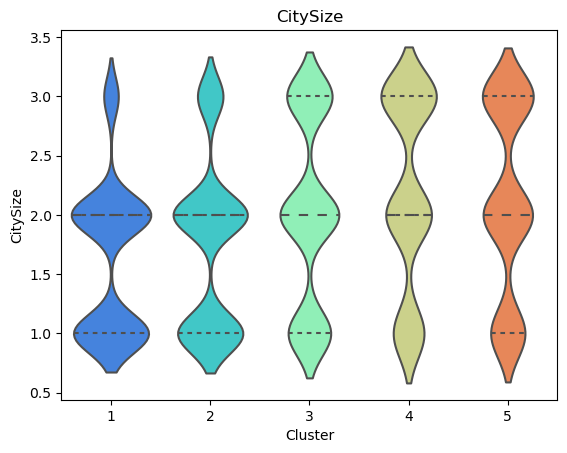

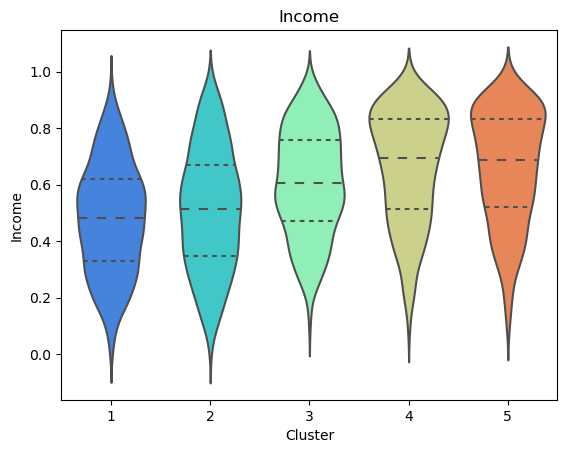

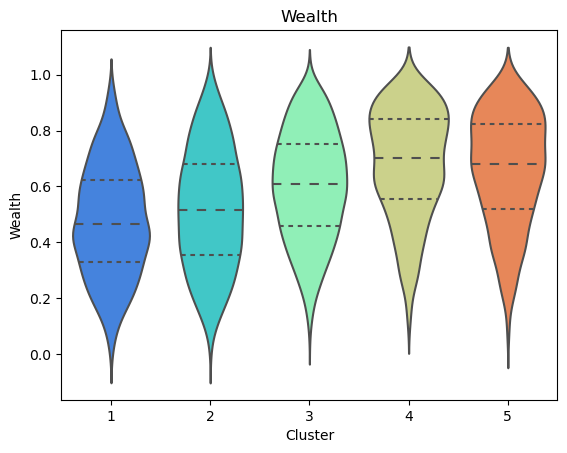

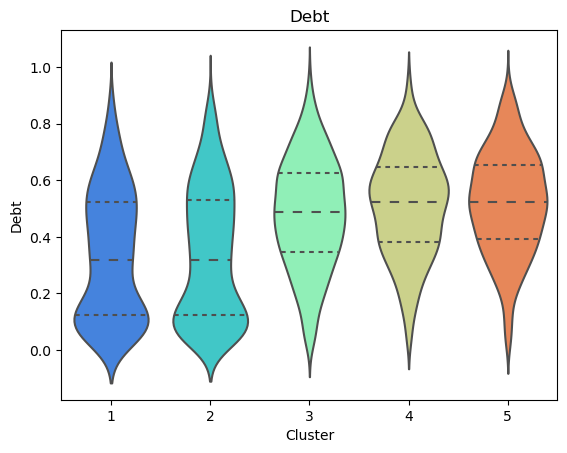

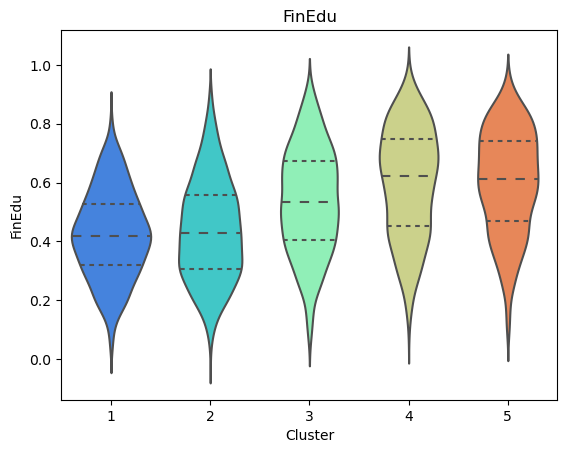

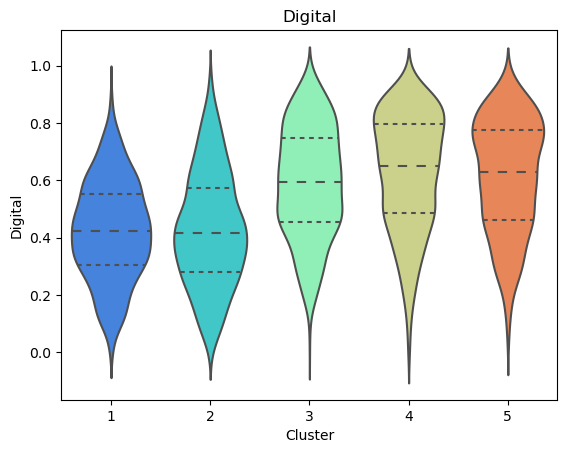

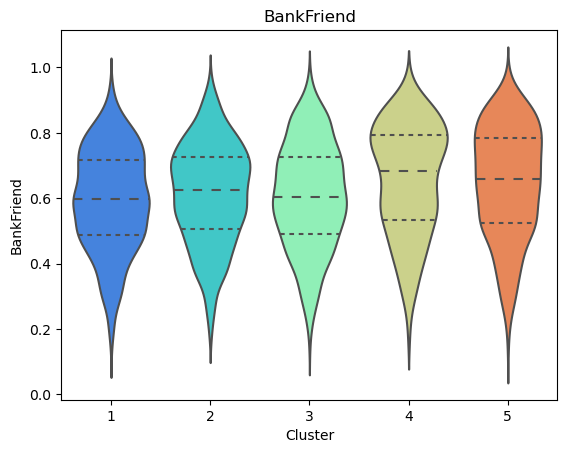

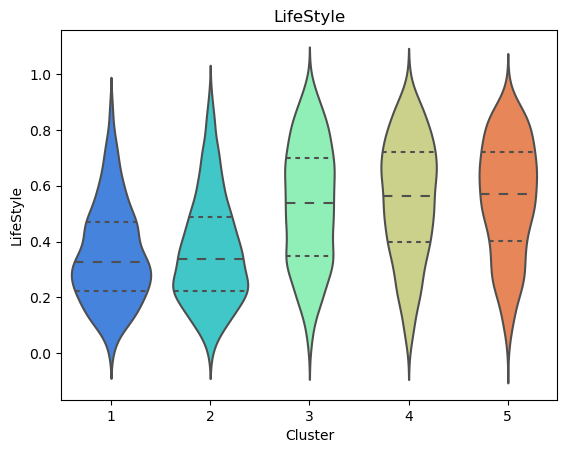

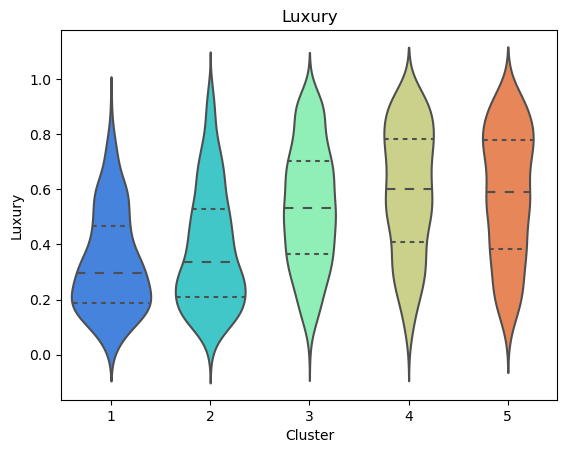

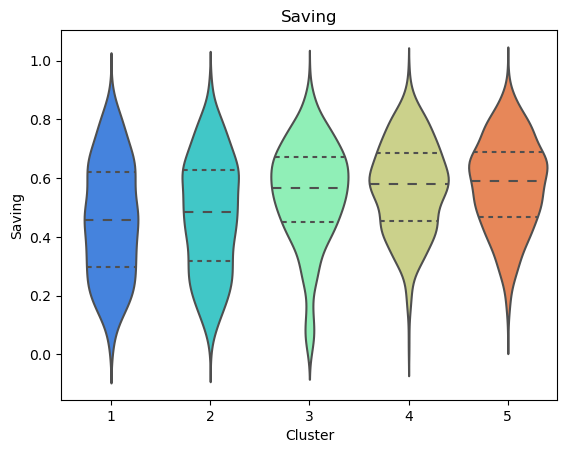

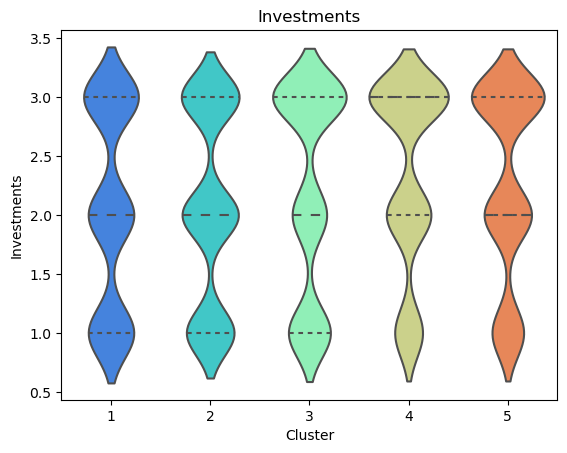

In [14]:
# boxplots

for col in df_red.columns[:-1]:
    sns.violinplot(x = 'Cluster', y = col, data = df_red, inner = 'quartile', palette = sns.color_palette('rainbow', 5))
    plt.title(col)
    plt.show()

# Clusters visualization
### t-SNE dimensionality reduction (two dimensions)

In [15]:
# t-sne dimensionality reduction

X = df_red.drop('Cluster', axis = 1)
tsne = TSNE(n_components = 2, random_state = 42)
embedded_data = tsne.fit_transform(X)

In [16]:
# clusterized dim-reducted data

embedded_df = pd.DataFrame(embedded_data, columns = ['Dimension 1', 'Dimension 2'])
embedded_df['Cluster'] = clusters

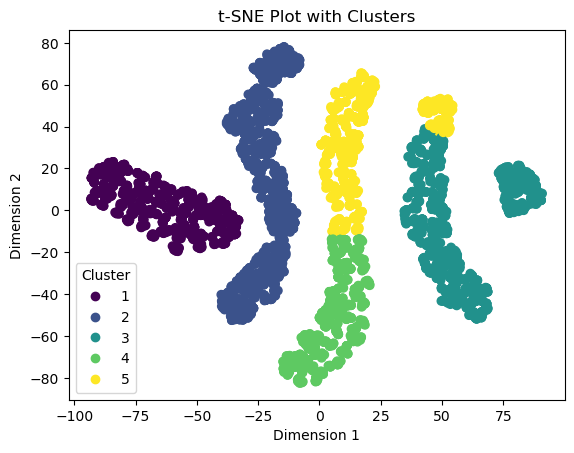

In [17]:
# clusters plot on 2 dimensions

scatter = plt.scatter(embedded_df['Dimension 1'], embedded_df['Dimension 2'], c = embedded_df['Cluster'], cmap = 'viridis')
plt.legend(*scatter.legend_elements(), title = "Cluster")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Plot with Clusters')
plt.show()